In [2]:
import numpy as np
from matplotlib import pyplot as plt
import gsw
import xarray as xr
from ctd2xray import cchdo
import netCDF4
%matplotlib inline

In [3]:
from mpl_toolkits.basemap import Basemap
ds = xr.open_mfdataset('/home/cjp2164/tutorial/section.nc')
ds2 = xr.open_mfdataset('/home/cjp2164/tutorial/section2.nc')
sat = xr.open_mfdataset('/home/cjp2164/tutorial/data/dataset-duacs-dt-global-allsat-madt-h_1478183961082.nc')
sat

<xarray.Dataset>
Dimensions:  (lat: 21, lon: 1440, time: 69)
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
  * time     (time) datetime64[ns] 2011-02-19 2011-02-20 2011-02-21 ...
  * lat      (lat) float32 -69.875 -69.625 -69.375 -69.125 -68.875 -68.625 ...
Data variables:
    crs      int32 -2147483647
    adt      (time, lat, lon) float64 nan -1.419 -1.406 -1.392 -1.376 -1.361 ...
Attributes:
    title: DT merged all satellites Global Ocean Gridded Absolute Dynamic Topography L4 product
    institution: CNES, CLS
    references: http://www.aviso.altimetry.fr
    source: Altimetry measurements
    Conventions: CF-1.0
    history: Data extracted from dataset http://opendap.aviso.altimetry.fr/thredds/dodsC/dataset-duacs-dt-global-allsat-madt-h
    time_min: 22329.0
    time_max: 22397.0
    julian_day_unit: days since 1950-01-01 00:00:00
    latitude_min: -69.875
    latitude_max: -64.875
    longitude_min: 0.125
    longitude_max: 359.875

/usr/local/anaconda/lib/python2.7/site-packages/dask/array/reductions.py:183: RuntimeWarning: invalid value encountered in divide
  pair['n'].sum(dtype=dtype, **kwargs), dtype=dtype)


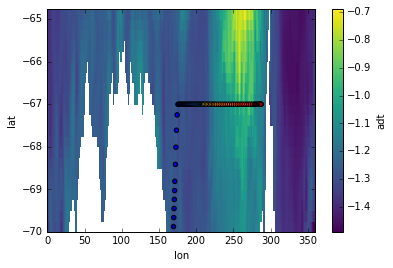

In [4]:
adt_mean=sat.adt.mean(dim='time')
adt_mean.plot()
plt.scatter(ds.longitude, ds.latitude, c=ds.station)

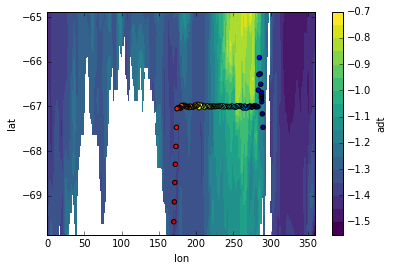

In [14]:
sat2 = xr.open_mfdataset('/home/cjp2164/tutorial/data/dataset-duacs-dt-global-allsat-madt-h_1478185498436.nc')
adt_mean2=sat2.adt.mean(dim='time')
adt_mean2.plot.contourf(levels=20)
plt.scatter(ds2.longitude, ds2.latitude, c=ds2.station)

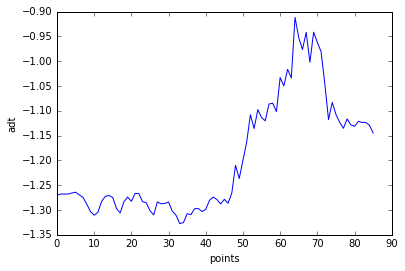

In [6]:
from datetime import datetime
adt_regrid = sat.adt.sel_points(
                               lon=ds.longitude,
                               lat=ds.latitude,
                               time=ds.time,
                               method='nearest')
adt_regrid.plot()
adt1=adt_regrid.to_dataset()
adt1.to_netcdf('adt.nc')

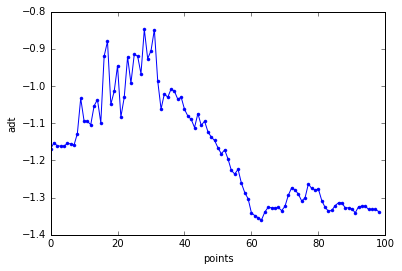

In [7]:
adt2_regrid = sat2.adt.sel_points(
                                lon=ds2.longitude,
                                lat=ds2.latitude,
                                time=ds2.time,
                                method='nearest')
adt2_regrid.plot(marker='.')
adt2=adt2_regrid.to_dataset()
adt2.to_netcdf('adt2.nc')

In [8]:
adt2

<xarray.Dataset>
Dimensions:  (points: 99)
Coordinates:
    lat      (points) float32 -67.375 -67.125 -66.875 -66.875 -66.875 ...
    lon      (points) float32 289.875 288.875 288.125 287.625 287.625 ...
    time     (points) datetime64[ns] 1993-02-14 1993-02-14 1993-02-14 ...
  * points   (points) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Data variables:
    adt      (points) float64 -1.169 -1.153 -1.161 -1.162 -1.162 -1.154 ...

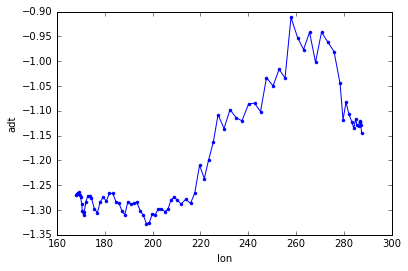

In [12]:
adt1.adt.swap_dims({'points': 'lon'}).plot(marker='.')